In [261]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

In [5]:
with open('2021_02_14_22_16_10.txt') as json_file:
    data = json.load(json_file)

In [193]:
df = pd.DataFrame(data).transpose()

# Lands without plan/block/lot as their legal description are usually farm lands, acres in size
df = df[df['PLAN'].notna()]
df = df[df['BLOCK'].notna()]
df = df[df['LOT'].notna()]

# Lands wihtout dates will be missing the values field as well, usually due to subdivision
df = df[df['DATE(DMY)'].notna()]
# df[df.isna().any(axis=1)]
# df = 
df = df.drop(columns=['LINC', 'SHORTLEGAL', 'TITLENUMBER', 'ATS REFERENCE', 'REFERENCE NUMBER', 'REGISTRATION', 'raw'])

# We only want the data in Edmonton for now
df = df[df['MUNICIPALITY']=='CITY OF EDMONTON']

# Some of the plan/block/lot are not purly number, i.e. ONEHUNDREDANDTHREE(103), so we need to deal with that
extractable_blocks = df[~df['BLOCK'].str.isnumeric()]['BLOCK'].str.extract('(\d+)')
for ind in extractable_blocks.index:
    # only NaN values will be float    
    if not isinstance(extractable_blocks.loc[ind].values[0], float):
        df.loc[ind]['BLOCK'] = extractable_blocks.loc[ind].values[0]
        
extractable_lots = df[~df['LOT'].str.isnumeric()]['LOT'].str.extract('(\d+)')
for ind in extractable_lots.index:
    # only NaN values will be float    
    if not isinstance(extractable_lots.loc[ind].values[0], float):
        df.loc[ind]['LOT'] = extractable_lots.loc[ind].values[0]

# convert the date strings to the pandas datetime type
df['DATE(DMY)'] = pd.to_datetime(df['DATE(DMY)'])
df['Registration Date'] = pd.to_datetime(df['Registration Date'])
df['Change/Cancel Date'] = pd.to_datetime(df['Change/Cancel Date'])

# # Clean the sold value field
df['VALUE'] = df['VALUE'].str.replace("$","")
df['VALUE'] = df['VALUE'].str.replace(",","")
df['VALUE'] = df['VALUE'].astype(float)


# Earliest assesment data is from 2012, so we cutoff the data before that 
df = df[df['DATE(DMY)']>"01/01/2012"]
# latest assesment data is from 2019, so we cutoff the data after that 
df = df[df['DATE(DMY)']<"12/31/2019"]
df
# df[df['DOCUMENTTYPE']!="TRANSFER OF LAND"]

,condominium,PLAN,BLOCK,LOT,Surface Rights Only,ESTATE,MUNICIPALITY,DATE(DMY),DOCUMENTTYPE,VALUE,CONSIDERATION,LINC Number,Registration Date,Change/Cancel Date
0033375222,False,A)0826193SUBDIVISION2.345.78,1,1,True,FEE SIMPLE,CITY OF EDMONTON,2013-03-15,TRANSFER OF LAND,2350000.0,"$2,350,000",0033375222,2013-03-15,2018-03-28
0033884123,False,A)0924715SUBDIVISION3.518.67,1,2,True,FEE SIMPLE,CITY OF EDMONTON,2013-08-27,TRANSFER OF LAND,1962675.0,"$1,962,675",0033884123,2013-08-27,2013-08-27
0035547786,False,1320189,1,1,True,FEE SIMPLE,CITY OF EDMONTON,2015-05-26,TRANSFER OF LAND,420000.0,"$420,000",0035547786,2015-05-26,2019-09-05
0037406790,False,1624132,1,3,True,FEE SIMPLE,CITY OF EDMONTON,2017-05-01,TRANSFER OF LAND,1000000.0,$10,0037406790,2017-05-01,2017-12-06
0033819517,False,0922802,1,2,True,FEE SIMPLE,CITY OF EDMONTON,2017-11-25,TRANSFER OF LAND,836000.0,"$836,000",0033819517,2017-11-25,2018-12-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0015126907,False,Q,3,3,True,FEE SIMPLE,CITY OF EDMONTON,2019-11-27,TRANSFER OF LAND,620000.0,"$620,000",0015126907,2019-11-27,2021-01-16
0017226747,False,4400R,173,2,True,FEE SIMPLE,CITY OF EDMONTON,2019-10-12,TRANSFER OF LAND,325000.0,"$325,000",0017226747,2019-10-12,2020-01-20
0016826315,False,2874P,1,11,True,FEE SIMPLE,CITY OF EDMONTON,2019-11-12,TRANSFER OF LAND,551750.0,SEE INSTRUMENT,0016826315,2019-11-12,2020-04-02
0015551949,False,I17,40,22,True,FEE SIMPLE,CITY OF EDMONTON,2019-12-20,TRANSFER OF LAND,280000.0,"$280,000",0015551949,2019-12-20,2020-10-02


In [192]:
df['Change/Cancel Date']

0014852990   2020-11-26
0029191723   2020-07-02
0027964774   2015-05-26
0027964782   2014-02-10
0023116569   2019-10-22
                ...    
0019907542   2020-07-12
0020586922   2021-01-29
0019907526   2015-08-05
0010574607   2013-06-17
0027645036   2018-02-10
Name: Change/Cancel Date, Length: 977, dtype: datetime64[ns]

In [148]:
# ~df['BLOCK'].str.isnumeric()
# df[~df['BLOCK'].str.isnumeric()]['BLOCK'].str.extract('(\d+)').loc['0015746688'].values[0]
# df.loc['0015746688']
# df.loc['0012095750']
# extractable_blocks.loc[ind].values[0]
# isinstance(extractable_blocks.loc['0019889674'].values[0], float)
# extractable_blocks.loc['0019889674'].values[0].isnumeric()
# extractable_blocks
# pd.to_datetime(df['DATE(DMY)'])
df['VALUE'].astype(float)

0033375222    2350000.0
0033884123    1962675.0
0035547786     420000.0
0037406790    1000000.0
0033819517     836000.0
                ...    
0015126907     620000.0
0017226747     325000.0
0016826315     551750.0
0015551949     280000.0
0034379743     750000.0
Name: VALUE, Length: 411, dtype: float64

In [195]:
prop_info = pd.read_csv('Property_Assessment_Data__2019.csv')
prop_info = prop_info[['Account Number', 'Suite', 'House Number', 'Street Name', 'Legal Description', 'Latitude', 'Longitude']]

In [254]:
def get_gps(plan, block, lot, prop_info=prop_info):
    result = prop_info[prop_info['Legal Description'].str.contains(f"{plan}.*{block}.*{lot}", na=False)]
#     print(result)
    if len(result) != 0 :
        try:
            return [result['Latitude'].iloc[0], result['Longitude'].iloc[0]]
        except:
            print(result)

get_gps("RN52", "3", "58", prop_info=prop_info)
gps_map = {}

for i in df.index:
    plan = df.loc[i]["PLAN"]
    block = df.loc[i]["BLOCK"]
    lot = df.loc[i]["LOT"]
    if ')' in plan:
        continue 
    gps_map[i] = get_gps(plan, block, lot)


In [247]:
df.loc[i]["PLAN"]

'1320189'

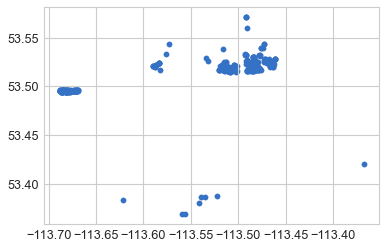

In [264]:
x = []
y = []
for key in gps_map:
    if gps_map[key] == None:
        continue
    y.append(gps_map[key][0])
    x.append(gps_map[key][1])
plt.scatter(x,y)

In [181]:
print(data['0036891547']['raw'])


S
LINC             SHORT LEGAL                                   TITLE NUMBER
0036 891 547     1524641;1;7                                   192 232 244

LEGAL DESCRIPTION
PLAN 1524641  
BLOCK 1  
LOT 7  
EXCEPTING THEREOUT ALL MINES AND MINERALS  
AREA: 1.29 HECTARES (3.19 ACRES) MORE OR LESS  
  
ESTATE: FEE SIMPLE  
ATS REFERENCE: 4;24;51;5;NW

MUNICIPALITY: LEDUC COUNTY

REFERENCE NUMBER: 152 395 055

--------------------------------------------------------------------------------
                         REGISTERED OWNER(S)
REGISTRATION    DATE(DMY)  DOCUMENT TYPE      VALUE           CONSIDERATION
--------------------------------------------------------------------------------

192 232 244    25/09/2019  TRANSFER OF LAND   $1,475,000      $1,475,000


In [185]:

[x for x in data if ('PLAN' in data[x] and 'BLOCK' in data[x] and "7" in data[x]['PLAN'])]

[]

In [187]:

data[list(data.keys())[0]]['PLAN']
# [x for x in data]

'4572RS'

In [266]:
prop_info.shape

(402419, 7)